In [24]:
import numpy as np
import math
import cv2
import os

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [19]:
# Reflectance
with open('/media/liwei/Data/GCOM-C_RSRF/Rs_VN04/20220107/Rs_VN04_20220107.dat','rb') as fp:      
    SGLI_Rs_VN04 = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)
with open('/media/liwei/Data/GCOM-C_RSRF/Rs_VN04/20220107/Rs_VN04_20220107_m.dat','rb') as fp:      
    SGLI_Rs_VN04_m = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)

/tmp/ipykernel_275323/3033051944.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_Rs_VN04 = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)
/tmp/ipykernel_275323/3033051944.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_Rs_VN04_m = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)


In [ ]:
with open('/media/liwei/Data/GCOM-C_RSRF/Rs_VN04/20220107/Rs_VN04_20220107.dat','rb') as fp:      
    SGLI_Rs_VN04 = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)

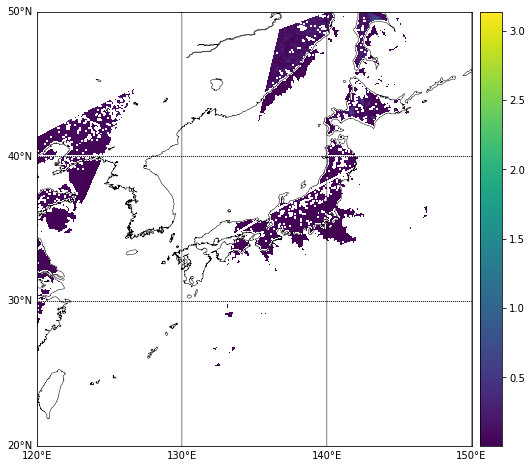

In [21]:
fig = plt.figure(figsize=(16,8))
m = Basemap(projection='cyl', resolution='i',
            llcrnrlat=20, urcrnrlat = 50,
            llcrnrlon=120, urcrnrlon = 150,
            lon_0=135, lat_0=35)                
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(20, 51, 10), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(120, 151, 10), labels=[0,0,0,1], fontsize=10)
m.imshow(SGLI_Rs_VN04,origin='upper')
cb = m.colorbar()

plt.show()
fig.savefig('map2.jpg',dpi = 1000)



In [39]:
YYYY='2022'
MM=['01']
DD=['11']
HH=['00','01','02','03','04','05','06','07','08']
MIN=['00','10','20','30','40','50']
match_point = 2900,4050

In [55]:
# import AHI
with open('/media/liwei/Data/AHI_Angle/Viewer_angle/view_zM_JAPAN_05.dat','rb') as fp:
    AHI_VZA = np.fromstring(fp.read()).reshape(6000,6000)[match_point]
with open('/media/liwei/Data/AHI_Angle/Viewer_angle/view_aM_JAPAN_05.dat','rb') as fp:
    AHI_VAA = np.fromstring(fp.read()).reshape(6000,6000)[match_point]


for m in MM:
    for d in DD:
        SGLI_date = YYYY + m + d
        with open('/media/liwei/Data/GCOM-C_RSRF/Sensor_azimuth/{}/Sensor_azimuth_{}.dat'.format(SGLI_date,SGLI_date),'rb') as fp:      
            SGLI_VAA = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]
        with open('/media/liwei/Data/GCOM-C_RSRF/Sensor_zenith/{}/Sensor_zenith_{}.dat'.format(SGLI_date,SGLI_date),'rb') as fp:      
            SGLI_VZA = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]

        with open('/media/liwei/Data/GCOM-C_RSRF/Solar_azimuth/{}/Solar_azimuth_{}.dat'.format(SGLI_date,SGLI_date),'rb') as fp:      
            SGLI_SAA = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]
        with open('/media/liwei/Data/GCOM-C_RSRF/Solar_zenith/{}/Solar_zenith_{}.dat'.format(SGLI_date,SGLI_date),'rb') as fp:      
            SGLI_SZA = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]

        # PL

        with open('/media/liwei/Data/GCOM-C_RSRF/Sensor_azimuth_PL/{}/Sensor_azimuth_PL_{}.dat'.format(SGLI_date,SGLI_date),'rb') as fp:      
            SGLI_VAA_PL = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]
        with open('/media/liwei/Data/GCOM-C_RSRF/Sensor_zenith_PL/{}/Sensor_zenith_PL_{}.dat'.format(SGLI_date,SGLI_date),'rb') as fp:      
            SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]

        with open('/media/liwei/Data/GCOM-C_RSRF/Solar_azimuth_PL/{}/Solar_azimuth_PL_{}.dat'.format(SGLI_date,SGLI_date),'rb') as fp:      
            SGLI_SAA_PL = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]
        with open('/media/liwei/Data/GCOM-C_RSRF/Solar_zenith_PL/{}/Solar_zenith_PL_{}.dat'.format(SGLI_date,SGLI_date),'rb') as fp:      
            SGLI_SZA_PL = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]
        
        
        # RAA
        
        SGLI_RAA = abs(SGLI_SAA - SGLI_VAA)
        if SGLI_RAA > 180:
            SGLI_RAA = 360 - SGLI_RAA
        
        SGLI_RAA_PL = abs(SGLI_SAA_PL - SGLI_VAA_PL)
        if SGLI_RAA_PL > 180:
            SGLI_RAA_PL = 360 - SGLI_RAA_PL
            
            
        for h in HH:
            for minu in MIN:
                date = YYYY+ m + d + h + minu
                # AHI Solar angle     
                with open('/media/liwei/Data/AHI_Angle/Solar_zenith_angle/solar_zM_{}.dat'.format(date),'rb') as fp:
                    AHI_SZA = np.fromstring(fp.read()).reshape(3000,3000) 
                with open('/media/liwei/Data/AHI_Angle/Solar_azimuth_angle/solar_aM_{}.dat'.format(date),'rb') as fp:
                    AHI_SAA = np.fromstring(fp.read()).reshape(3000,3000)

                # Solar angle down sampling
                AHI_SAA = cv2.resize(np.array(AHI_SAA),(6000,6000),interpolation=cv2.INTER_NEAREST)[match_point]
                AHI_SZA = cv2.resize(np.array(AHI_SZA),(6000,6000),interpolation=cv2.INTER_NEAREST)[match_point]
                
                AHI_RAA = abs(AHI_SAA - AHI_VAA)
                
                if AHI_RAA > 180:
                    AHI_RAA = 360 - AHI_RAA
                    
                VZA_Matching = abs(math.cos(math.radians(SGLI_VZA)) - math.cos(math.radians(AHI_VZA)))
                print(VZA_Matching)
                if VZA_Matching < 0.025:
                    RAA_Matching = abs(math.cos(math.radians(SGLI_RAA)) - math.cos(math.radians(AHI_RAA)))
                    print(RAA_Matching)
                    if RAA_Matching < 0.015:
                        print('AHI:{}'.format(data))
                        print('SGLI:{}'.format(SGLI_data))

/tmp/ipykernel_38287/3053433844.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  AHI_VZA = np.fromstring(fp.read()).reshape(6000,6000)[match_point]
/tmp/ipykernel_38287/3053433844.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  AHI_VAA = np.fromstring(fp.read()).reshape(6000,6000)[match_point]
/tmp/ipykernel_38287/3053433844.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAA = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]
/tmp/ipykernel_38287/3053433844.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)[match_point]
/tmp/ipy

0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797
0.20519520313149797


In [ ]:
''''
Matching site
http://asiaflux.net/index.php?page_id=22

九州 KHW: Kahoku Experiment watershed  33º 08' 13.3" N, 130º 42' 34.3" E 


In [ ]:
# import AHI
with open('/media/liwei/Data/AHI_Angle/Viewer_angle/view_zM_JAPAN_05.dat','rb') as fp:
    AHI_VZA = np.fromstring(fp.read()).reshape(6000,6000)[match_point]
with open('/media/liwei/Data/AHI_Angle/Viewer_angle/view_aM_JAPAN_05.dat','rb') as fp:
    AHI_VAA = np.fromstring(fp.read()).reshape(6000,6000)[match_point]

In [34]:
# SGLI VAZ
SGLI_VAZ_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth'
SGLI_VAZ_files = os.listdir(SGLI_VAZ_path)
SGLI_VAZ_files.sort()

SGLI_VAZ_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth_PL'
SGLI_VAZ_PL_files = os.listdir(SGLI_VAZ_PL_path)
SGLI_VAZ_PL_files.sort()

# SGLI VZA
SGLI_VZA_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith'
SGLI_VZA_files = os.listdir(SGLI_VZA_path)
SGLI_VZA_files.sort()

SGLI_VZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith_PL'
SGLI_VZA_PL_files = os.listdir(SGLI_VZA_PL_path)
SGLI_VZA_PL_files.sort()

# SGLI SAZ
SGLI_SAZ_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_azimuth'
SGLI_SAZ_files = os.listdir(SGLI_SAZ_path)
SGLI_SAZ_files.sort()

SGLI_SAZ_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_azimuth_PL'
SGLI_SAZ_PL_files = os.listdir(SGLI_SAZ_PL_path)
SGLI_SAZ_PL_files.sort()

# SGLI SZA
SGLI_SZA_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_zenith'
SGLI_SZA_files = os.listdir(SGLI_SZA_path)
SGLI_SZA_files.sort()

SGLI_SZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_zenith_PL'
SGLI_SZA_PL_files = os.listdir(SGLI_SZA_PL_path)
SGLI_SZA_PL_files.sort()

In [35]:
SGLI_SZA_PL_files

['20180101',
 '20180106',
 '20180107',
 '20180108',
 '20180109',
 '20180110',
 '20180111',
 '20180112',
 '20180113',
 '20180114',
 '20180115',
 '20180116',
 '20180117',
 '20180118',
 '20180119',
 '20180120',
 '20180121',
 '20180122',
 '20180123',
 '20180124',
 '20180125',
 '20180126',
 '20180127',
 '20180128',
 '20180129',
 '20180130']